In [1]:
'''
Week 1 SQL + Data Analysis Project (Chinook Database)

Introduction:

In this project, I use the Chinook SQLite database to practice SQL queries, pandas operations, and data visualization.  
The goal is to answer business-style questions such as customer behavior, revenue by country, and track length statistics.  

'''

'\nWeek 1 SQL + Data Analysis Project (Chinook Database)\n\nIntroduction:\n\nIn this project, I use the Chinook SQLite database to practice SQL queries, pandas operations, and data visualization.  \nThe goal is to answer business-style questions such as customer behavior, revenue by country, and track length statistics.  \n\n'

In [2]:
# Import required libraries and connect to the database

import pandas as pd
import matplotlib.pyplot as plt 
import sqlite3
import seaborn as sns

con = sqlite3.connect("Chinook_Sqlite.sqlite")

In [3]:
# List of USA based Customers

usa_customers = pd.read_sql("""
SELECT FirstName || ' ' || LastName AS FullName, Country
FROM Customer
WHERE Country = 'USA';
""", con)
usa_customers.head()

,FullName,Country
0,Frank Harris,USA
1,Jack Smith,USA
2,Michelle Brooks,USA
3,Tim Goyer,USA
4,Dan Miller,USA


In [4]:
# Invoices above $20

above_20 = pd.read_sql("""
SELECT InvoiceId, CustomerId, Total
FROM Invoice
WHERE Total >= 20;
""", con)
above_20.head()


,InvoiceId,CustomerId,Total
0,96,45,21.86
1,194,46,21.86
2,299,26,23.86
3,404,6,25.86


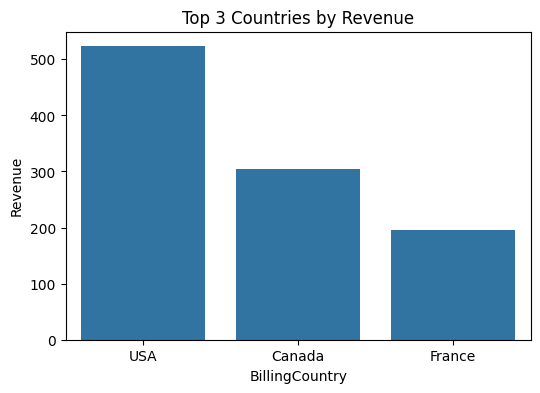

In [5]:
# Top 3 countries by total revenue (Visualization)

top_countries = pd.read_sql("""
SELECT BillingCountry, SUM(Total) AS Revenue
FROM Invoice
GROUP BY BillingCountry
ORDER BY Revenue DESC
LIMIT 3;
""", con)


plt.figure(figsize=(6,4))
sns.barplot(x="BillingCountry", y="Revenue", data=top_countries)
plt.title("Top 3 Countries by Revenue")
plt.show()


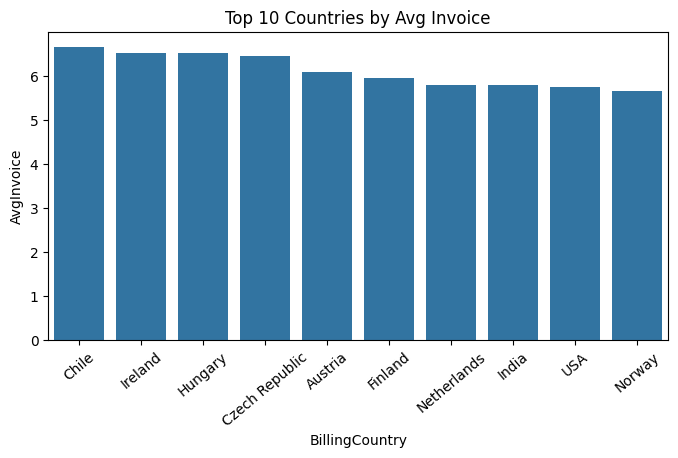

In [6]:
avg_invoice = pd.read_sql("""
SELECT BillingCountry, ROUND(AVG(Total),2) AS AvgInvoice
FROM Invoice
GROUP BY BillingCountry
ORDER BY AvgInvoice DESC;
""", con)

plt.figure(figsize=(8,4))
sns.barplot(x="BillingCountry", y="AvgInvoice", data=avg_invoice.head(10))
plt.xticks(rotation=40)
plt.title("Top 10 Countries by Avg Invoice")
plt.show()


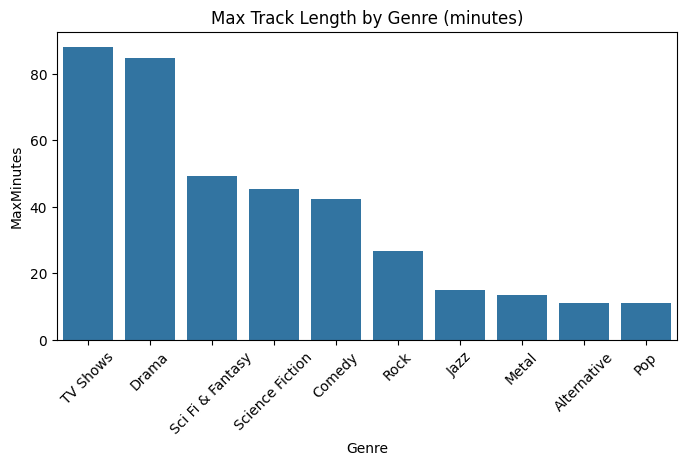

In [7]:
min_max_tracks = pd.read_sql("""
SELECT g.Name AS Genre,
       ROUND(MIN(t.Milliseconds)/60000.0,2) AS MinMinutes,
       ROUND(MAX(t.Milliseconds)/60000.0,2) AS MaxMinutes
FROM Track t
JOIN Genre g ON g.GenreId = t.GenreId
GROUP BY g.Name
ORDER BY MaxMinutes DESC;
""", con)
min_max_tracks.head()
plt.figure(figsize=(8,4))
sns.barplot(x="Genre", y="MaxMinutes", data=min_max_tracks.head(10))
plt.xticks(rotation=45)
plt.title("Max Track Length by Genre (minutes)")
plt.show()


In [8]:
# countries with revenue > 50

tables=pd.read_sql(
"""SELECT name
FROM sqlite_master
WHERE type = 'table';
""", con)
print(tables)

df=pd.read_sql(
"""SELECT *
FROM Invoice
""", con)

df


             name
0           Album
1          Artist
2        Customer
3        Employee
4           Genre
5         Invoice
6     InvoiceLine
7       MediaType
8        Playlist
9   PlaylistTrack
10          Track


,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,2,2009-01-01 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98
1,2,4,2009-01-02 00:00:00,Ullevålsveien 14,Oslo,None,Norway,0171,3.96
2,3,8,2009-01-03 00:00:00,Grétrystraat 63,Brussels,None,Belgium,1000,5.94
3,4,14,2009-01-06 00:00:00,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,8.91
4,5,23,2009-01-11 00:00:00,69 Salem Street,Boston,MA,USA,2113,13.86
...,...,...,...,...,...,...,...,...,...
407,408,25,2013-12-05 00:00:00,319 N. Frances Street,Madison,WI,USA,53703,3.96
408,409,29,2013-12-06 00:00:00,796 Dundas Street West,Toronto,ON,Canada,M6J 1V1,5.94
409,410,35,2013-12-09 00:00:00,"Rua dos Campeões Europeus de Viena, 4350",Porto,None,Portugal,None,8.91
410,411,44,2013-12-14 00:00:00,Porthaninkatu 9,Helsinki,None,Finland,00530,13.86


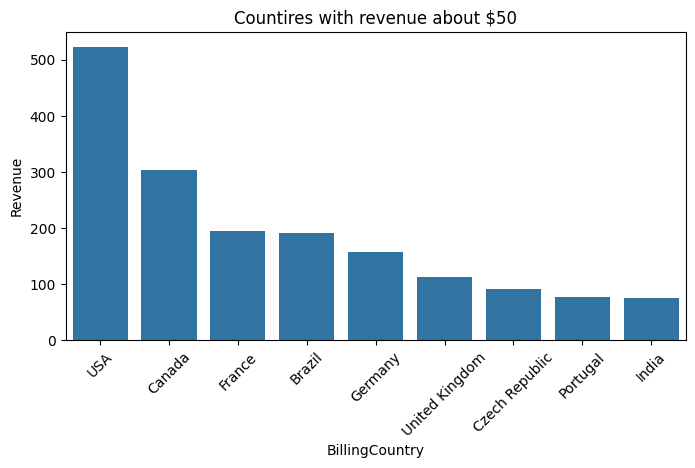

In [14]:
#countries with total revenue above $50

having_example = pd.read_sql("""
SELECT BillingCountry, SUM(Total) AS Revenue
FROM Invoice
GROUP BY BillingCountry
HAVING SUM(Total) > 50
ORDER BY Revenue DESC;
""", con)
having_example

plt.figure(figsize=(8,4))
sns.barplot(x="BillingCountry", y="Revenue", data=having_example)
plt.xticks(rotation=45)
plt.title("Countires with revenue about $50")
plt.show()
